In [ ]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 5.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive
from sklearn.feature_extraction.text import CountVectorizer
from html import unescape
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/xafnikitida_tweets.tsv", sep='\t')
tweets_df

,Unnamed: 0,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status
0,0,Wed Jun 29 17:43:21 +0000 2022,1542202071788683265,1542202071788683265,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...,False,"{'hashtags': [{'text': 'ξαφνικοθανατιτιδα', 'i...","{'media': [{'id': 1542163940481925122, 'id_str...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,False,7,0,False,False,False,el,NaN,NaN,NaN
1,1,Wed Jun 29 17:37:16 +0000 2022,1542200542386159616,1542200542386159616,RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...,False,"{'hashtags': [{'text': 'Πλεύρη', 'indices': [3...",NaN,"{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,72,0,False,False,NaN,el,NaN,NaN,NaN
2,2,Wed Jun 29 17:12:08 +0000 2022,1542194216192843778,1542194216192843778,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...,False,"{'hashtags': [{'text': 'ξαφνικοθανατιτιδα', 'i...","{'media': [{'id': 1542163940481925122, 'id_str...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,7,0,False,False,False,el,NaN,NaN,NaN
3,3,Wed Jun 29 17:11:20 +0000 2022,1542194015021457413,1542194015021457413,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...,False,"{'hashtags': [{'text': 'ξαφνικοθανατιτιδα', 'i...","{'media': [{'id': 1542163940481925122, 'id_str...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,False,7,0,False,False,False,el,NaN,NaN,NaN
4,4,Wed Jun 29 16:58:46 +0000 2022,1542190854344949762,1542190854344949762,RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...,False,"{'hashtags': [{'text': 'Πλεύρη', 'indices': [3...",NaN,"{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,72,0,False,False,NaN,el,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2875,Mon Jun 20 11:26:18 +0000 2022,1538845694114648067,1538845694114648067,RT @Kalhas821: Η Παγώνη μόλις δήλωσε στον #σκα...,False,"{'hashtags': [{'text': 'σκαι_ξεφτιλες', 'indic...",NaN,"{'iso_language_code': 'el', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,False,73,0,False,False,NaN,el,NaN,NaN,NaN
2876,2876,Mon Jun 20 11:25:44 +0000 2022,1538845553114730501,1538845553114730501,Η Παγώνη μόλις δήλωσε στον #σκαι_ξεφτιλες Ότι ...,True,"{'hashtags': [{'text': 'σκαι_ξεφτιλες', 'indic...",NaN,"{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,73,369,False,False,NaN,el,NaN,NaN,NaN
2877,2877,Mon Jun 20 11:23:43 +0000 2022,1538845042231623681,1538845042231623681,Μετά από 2μιση χρόνια κορωνοιου δεν υπάρχει κα...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,0,0,False,False,False,el,NaN,NaN,NaN
2878,2878,Mon Jun 20 11:19:45 +0000 2022,1538844045111439360,1538844045111439360,RT @panos__pao: Όταν η επιστήμη έχει φτάσει σε...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,13,0,False,False,NaN,el,NaN,NaN,NaN


In [ ]:
small_tweets = tweets_df[['created_at', 'text']]
small_tweets_renamed = small_tweets.rename(columns = {'created_at': 'date'})
small_tweets_renamed

,date,text
0,Wed Jun 29 17:43:21 +0000 2022,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...
1,Wed Jun 29 17:37:16 +0000 2022,RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...
2,Wed Jun 29 17:12:08 +0000 2022,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...
3,Wed Jun 29 17:11:20 +0000 2022,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...
4,Wed Jun 29 16:58:46 +0000 2022,RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...
...,...,...
2875,Mon Jun 20 11:26:18 +0000 2022,RT @Kalhas821: Η Παγώνη μόλις δήλωσε στον #σκα...
2876,Mon Jun 20 11:25:44 +0000 2022,Η Παγώνη μόλις δήλωσε στον #σκαι_ξεφτιλες Ότι ...
2877,Mon Jun 20 11:23:43 +0000 2022,Μετά από 2μιση χρόνια κορωνοιου δεν υπάρχει κα...
2878,Mon Jun 20 11:19:45 +0000 2022,RT @panos__pao: Όταν η επιστήμη έχει φτάσει σε...


In [ ]:
small_tweets_renamed.dtypes

date    object
text    object
dtype: object

In [ ]:
small_tweets_renamed['date'] = pd.to_datetime(small_tweets_renamed['date'], format='%a %b %d %H:%M:%S +0000 %Y')
small_tweets_renamed.dtypes

date    datetime64[ns]
text            object
dtype: object

In [ ]:
small_tweets_renamed['year'] = pd.DatetimeIndex(small_tweets_renamed['date']).year
small_tweets_renamed['month'] = pd.DatetimeIndex(small_tweets_renamed['date']).month
small_tweets_renamed['day'] = pd.DatetimeIndex(small_tweets_renamed['date']).day
small_tweets_renamed

,date,text,year,month,day
0,2022-06-29 17:43:21,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...,2022,6,29
1,2022-06-29 17:37:16,RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...,2022,6,29
2,2022-06-29 17:12:08,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...,2022,6,29
3,2022-06-29 17:11:20,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...,2022,6,29
4,2022-06-29 16:58:46,RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...,2022,6,29
...,...,...,...,...,...
2875,2022-06-20 11:26:18,RT @Kalhas821: Η Παγώνη μόλις δήλωσε στον #σκα...,2022,6,20
2876,2022-06-20 11:25:44,Η Παγώνη μόλις δήλωσε στον #σκαι_ξεφτιλες Ότι ...,2022,6,20
2877,2022-06-20 11:23:43,Μετά από 2μιση χρόνια κορωνοιου δεν υπάρχει κα...,2022,6,20
2878,2022-06-20 11:19:45,RT @panos__pao: Όταν η επιστήμη έχει φτάσει σε...,2022,6,20


In [ ]:
small_tweets_renamed['text'] = small_tweets_renamed['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


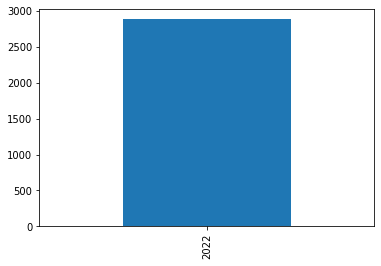

In [ ]:
small_tweets_renamed['year'].value_counts().plot(kind='bar')

In [ ]:
small_tweets_renamed[small_tweets_renamed['year']==2022]['text']

0       RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...
1       RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...
2       RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...
3       RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...
4       RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...
                              ...                        
2875    RT @Kalhas821: Η Παγώνη μόλις δήλωσε στον #σκα...
2876    Η Παγώνη μόλις δήλωσε στον #σκαι_ξεφτιλες Ότι ...
2877    Μετά από 2μιση χρόνια κορωνοιου δεν υπάρχει κα...
2878    RT @panos__pao: Όταν η επιστήμη έχει φτάσει σε...
2879    Κοίτα ρε φίλε που αυτοί που δεν βλέπουν #ξαφνι...
Name: text, Length: 2880, dtype: object

In [ ]:
list(STOPWORDS)[0:20]

['she',
 "what's",
 'itself',
 'which',
 'himself',
 'from',
 'yourselves',
 "shouldn't",
 'their',
 'into',
 'am',
 "how's",
 "you've",
 'not',
 "aren't",
 "it's",
 'at',
 'but',
 'did',
 "they're"]

In [ ]:
text = small_tweets_renamed[small_tweets_renamed['year']==2022]['text'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['εκάστου',
 'συχνοί',
 'τούτους',
 'οποίο',
 'ποιούς',
 'αφότου',
 'όλος',
 'πρώτες',
 'αντίς',
 'τόσος',
 'προτού',
 'άλλην',
 'οσεσδήποτε',
 'ετέρων',
 'καθώς',
 'όσοι',
 'έχουμε',
 'εκείνους',
 'τόση',
 'ίδιαν']

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
doc = nlp(small_tweets_renamed['text'][1])
' '.join(token.lemma_ for token in doc)

'RT @dstefanos : ο πήραν σε ο ψιλό ο # πλεύρη μέχρι και σε ο # ΣΚΑΙ ! « σε ο 30-59 δεν υπάρχω κλινικός όφελος , αλλά από εκεί και πέρα μπορώ κά …'

In [ ]:
text

'RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\n#ξαφνικοθανατιτιδα \n#ξαφνικιτιδα   RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη μέχρι και στον #ΣΚΑΙ! «Στο 30-59 δεν υπάρχει κλινικό όφελος, αλλά από εκεί και πέρα μπορεί κά… RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\n#ξαφνικοθανατιτιδα \n#ξαφνικιτιδα   RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\n#ξαφνικοθανατιτιδα \n#ξαφνικιτιδα   RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη μέχρι και στον #ΣΚΑΙ! «Στο 30-59 δεν υπάρχει κλινικό όφελος, αλλά από εκεί και πέρα μπορεί κά… RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη μέχρι και στον #ΣΚΑΙ! «Στο 30-59 δεν υπάρχει κλινικό όφελος, αλλά από εκεί και πέρα μπορεί κά… RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη μέχρι και στον #ΣΚΑΙ! «Στο 30-59 δεν υπάρχει κλινικό όφελος, αλλά από εκεί και πέρα μπορεί κά… RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη μέχρι και στον #ΣΚΑΙ! «Στο 30-59 δεν υπάρχει κλινικό όφελος, αλλά από εκεί και πέρα μπορεί κά… RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη

In [ ]:
text

'RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\n#ξαφνικοθανατιτιδα \n#ξαφνικιτιδα   RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη μέχρι και στον #ΣΚΑΙ! «Στο 30-59 δεν υπάρχει κλινικό όφελος, αλλά από εκεί και πέρα μπορεί κά… RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\n#ξαφνικοθανατιτιδα \n#ξαφνικιτιδα   RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\n#ξαφνικοθανατιτιδα \n#ξαφνικιτιδα   RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη μέχρι και στον #ΣΚΑΙ! «Στο 30-59 δεν υπάρχει κλινικό όφελος, αλλά από εκεί και πέρα μπορεί κά… RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη μέχρι και στον #ΣΚΑΙ! «Στο 30-59 δεν υπάρχει κλινικό όφελος, αλλά από εκεί και πέρα μπορεί κά… RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη μέχρι και στον #ΣΚΑΙ! «Στο 30-59 δεν υπάρχει κλινικό όφελος, αλλά από εκεί και πέρα μπορεί κά… RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη μέχρι και στον #ΣΚΑΙ! «Στο 30-59 δεν υπάρχει κλινικό όφελος, αλλά από εκεί και πέρα μπορεί κά… RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη

In [68]:
full_doc = nlp(text)
clear_text = ' '.join(token.lemma_ for token in full_doc)

wordcloud = WordCloud(
    stopwords = ['rt', 'v_stavropoulou', 'penny_rage', 'dstefanos', 'zantos78516664']+list(nlp.Defaults.stop_words),
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def token_creator(doc):
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
    return(lemmatized_tokens)

In [ ]:
countVec = CountVectorizer()
count_vector = countVec.fit_transform(small_tweets_renamed['text'])
results = pd.DataFrame(count_vector.toarray(), columns=countVec.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,02,05,0minus_prime,10,100,107,11,11χρ,12,...,όταν,ότι,όφελος,όχθη,όχι,ύπνο,ύποπτων,ύψος,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
countVec = CountVectorizer( stop_words= ['rt', 't_anastasiou', 'κάνει']+list(nlp.Defaults.stop_words), max_features=20)
count_vector = countVec.fit_transform(small_tweets_renamed['text'])
results = pd.DataFrame(count_vector.toarray(), columns=countVec.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,4η,barbaradavari,biciboni,fkbxdact2hdl3sp,kalhas821,penny_rage,zantos78516664,απο,δόση,ειναι,εμβολιασμενοι,εμβολιο,εμβόλια,κορονοιος,κρουσματα,κόσμος,ξαφνικιτιδα,ξαφνικοθανατιτιδα,πέθανε,προγραμμα_ευθανασιας
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
countVec = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=token_creator)
count_vector = countVec.fit_transform(small_tweets_renamed['text'])
results = pd.DataFrame(count_vector.toarray(), columns=countVec.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,\n\n,-αύξηση,-ελαστόλυσ,-κεραυνοβόλες,...,1ος,2.200,2016,26χρονος,30-59,...,φεύγω,φταίει,φωτογραφία,χορό,χρόνος,ψέκι,ψεκ,ψιλό,ωρών,όφελος
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
countVec = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)
count_vector = countVec.fit_transform(small_tweets_renamed['text'])
results = pd.DataFrame(count_vector.toarray(), columns=countVec.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,1η,200,2016,2022,26χρονος,30,35,3πλοε,...,υπόλοιπη,φταίει,φωτογραφίες,χορό,χρόνια,ψέκια,ψεκ,ψιλό,ωρών,όφελος
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
most_used_words=results.sum(axis=0)
most_used_words.sort_values(ascending=False)

ξαφνικιτιδα             1178
ξαφνικοθανατιτιδα        724
εμβολιο                  463
fkbxdact2hdl3sp          286
απο                      209
προγραμμα_ευθανασιας     190
κορονοιος                178
εμβόλια                  171
penny_rage               170
δόση                     165
barbaradavari            162
kalhas821                158
κόσμος                   153
κρουσματα                151
πέθανε                   146
4η                       144
εμβολιασμενοι            138
biciboni                 132
ειναι                    127
zantos78516664           119
dtype: int64

In [ ]:
countVec = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b')
count_vector = countVec.fit_transform(small_tweets_renamed['text'])
results = pd.DataFrame(count_vector.toarray(), columns=countVec.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,κυβέρνηση,κυβερνητική,κυκλοφορεί,κυρά,κυρίες,κυριακή,κυριε
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [ ]:
countVec = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) )
count_vector = countVec.fit_transform(small_tweets_renamed['text'])
results = pd.DataFrame(count_vector.toarray(), columns=countVec.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,4η δόση,fkbxdact2hdl3sp ιταλία,rt barbaradavari,rt biciboni,rt fkbxdact2hdl3sp,rt kalhas821,rt penny_rage,rt zantos78516664,απο εμβόλια,αποκαλεί δολοφόνους,βγαίνει κόσμος,δολοφόνους ελλάδα,εμβόλια αποκαλεί,θυμάτων απο,ιταλία βγαίνει,κόσμος φωτογραφίες,ξαφνικιτιδα ξαφνικοθανατιτιδα,ξαφνικοθανατιτιδα ξαφνικιτιδα,ξαφνικοθανατιτιδα προγραμμα_ευθανασιας,φωτογραφίες θυμάτων
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

ξαφνικιτιδα ξαφνικοθανατιτιδα             399
rt fkbxdact2hdl3sp                        285
ξαφνικοθανατιτιδα ξαφνικιτιδα             238
rt penny_rage                             170
rt barbaradavari                          162
rt kalhas821                              156
rt biciboni                               131
ξαφνικοθανατιτιδα προγραμμα_ευθανασιας    120
rt zantos78516664                         119
4η δόση                                   108
θυμάτων απο                               108
κόσμος φωτογραφίες                        108
ιταλία βγαίνει                            108
βγαίνει κόσμος                            108
εμβόλια αποκαλεί                          108
δολοφόνους ελλάδα                         108
αποκαλεί δολοφόνους                       108
απο εμβόλια                               108
φωτογραφίες θυμάτων                       108
fkbxdact2hdl3sp ιταλία                    107
dtype: int64

In [ ]:
summary_words =  results.sum(axis =0)
summary_words.sort_values(ascending = False) 

ξαφνικιτιδα ξαφνικοθανατιτιδα             399
rt fkbxdact2hdl3sp                        285
ξαφνικοθανατιτιδα ξαφνικιτιδα             238
rt penny_rage                             170
rt barbaradavari                          162
rt kalhas821                              156
rt biciboni                               131
ξαφνικοθανατιτιδα προγραμμα_ευθανασιας    120
rt zantos78516664                         119
4η δόση                                   108
θυμάτων απο                               108
κόσμος φωτογραφίες                        108
ιταλία βγαίνει                            108
βγαίνει κόσμος                            108
εμβόλια αποκαλεί                          108
δολοφόνους ελλάδα                         108
αποκαλεί δολοφόνους                       108
απο εμβόλια                               108
φωτογραφίες θυμάτων                       108
fkbxdact2hdl3sp ιταλία                    107
dtype: int64

In [ ]:
countVec = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bcov[a-z0-9-_]*\\b')
count_vector = countVec.fit_transform(small_tweets_renamed['text'])
results = pd.DataFrame(count_vector.toarray(), columns=countVec.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,covid,covid-19,covid19
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

covid19     106
covid        34
covid-19      6
dtype: int64

In [ ]:
countVec = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, vocabulary = ['αιφνίδιοι', 'αιφνίδιος'])
count_vector = countVec.fit_transform(small_tweets_renamed['text'])
results = pd.DataFrame(count_vector.toarray(), columns=countVec.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,αιφνίδιοι,αιφνίδιος
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(small_tweets_renamed['text'])
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,100,12,120,13χρόνος,15χρονος,1η,200,2016,...,χορό,χρόνια,χρόνος,ψέκια,ψεκ,ψεκια,ψιλό,ωρών,όφελος,ώρα
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.306609,0.0,0.306609,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.306609,0.0,0.306609,0.0


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.01462914 1.         ... 0.         0.01855226 0.05048537]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.01462914 1.         ... 0.         0.01855226 0.05048537]
 [0.01462914 1.         0.01462914 ... 0.14418967 0.00836584 0.        ]
 [1.         0.01462914 1.         ... 0.         0.01855226 0.05048537]
 ...
 [0.         0.14418967 0.         ... 1.         0.         0.        ]
 [0.01855226 0.00836584 0.01855226 ... 0.         1.         0.        ]
 [0.05048537 0.         0.05048537 ... 0.         0.         1.        ]]


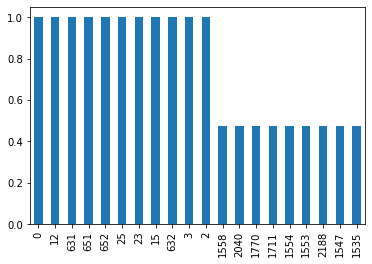

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
small_tweets_renamed['text'].loc[3]

'RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\n#ξαφνικοθανατιτιδα \n#ξαφνικιτιδα  '